In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Step 1: Load the CSV file
data1 = pd.read_csv('BIOBOT_DATASET (1).csv')

# Step 2: Inspect the data
print(data1.head())
print(data1.info())
print(data1.isnull().sum())

# Step 3: Handle missing values and remove duplicates
# Drop columns with any missing values
data = data1.dropna(axis=1)

# Drop rows with missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Step 4: Convert non-numeric columns to numeric
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    data.loc[:, column] = label_encoders[column].fit_transform(data[column])

# Step 5: Encode the target variable
data['Disease'] = label_encoders['Disease'].fit_transform(data['Disease'])

# Step 6: Check class distribution
print(data['Disease'].value_counts())

# Step 7: Feature selection
# Check if the specified feature columns exist in the data
feature_columns = ['S1', 'S2', 'S3', 'S4', 'S5']

missing_features = [col for col in feature_columns if col not in data.columns]
print(f"Missing features: {missing_features}")

# Select only the existing features
feature_columns = [col for col in feature_columns if col in data.columns]
target_column = 'Disease'

X = data[feature_columns]
y = data[target_column]

# Step 8: Split the data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify class distribution in training and test sets
print("Training set class distribution:")
print(y_train.value_counts())
print("Test set class distribution:")
print(y_test.value_counts())

# Step 9: Normalize or scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 11: Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Step 12: Save the model
joblib.dump(model, 'logistic_regression_model.pkl')


     Disease            S1             S2             S3  \
0  Diabetes        fatigue    weight_loss   restlessness   
1  Diabetes        fatigue    weight_loss   restlessness   
2  Diabetes    weight_loss   restlessness       lethargy   
3  Diabetes        fatigue   restlessness       lethargy   
4  Diabetes        fatigue    weight_loss       lethargy   

                       S4                             S5  Unnamed: 6  \
0                lethargy          irregular_sugar_level         NaN   
1                lethargy          irregular_sugar_level         NaN   
2   irregular_sugar_level   blurred_and_distorted_vision         NaN   
3   irregular_sugar_level   blurred_and_distorted_vision         NaN   
4   irregular_sugar_level   blurred_and_distorted_vision         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0         NaN         NaN         NaN          NaN         NaN         NaN   
1         NaN         NaN         NaN          NaN

['logistic_regression_model.pkl']

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



gb_regressor= GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42)

gb_regressor.fit(X_train,y_train)

y_pred=gb_regressor.predict(X_test)

mse= mean_squared_error(y_test,y_pred)
print(mse)

0.17418988837755223


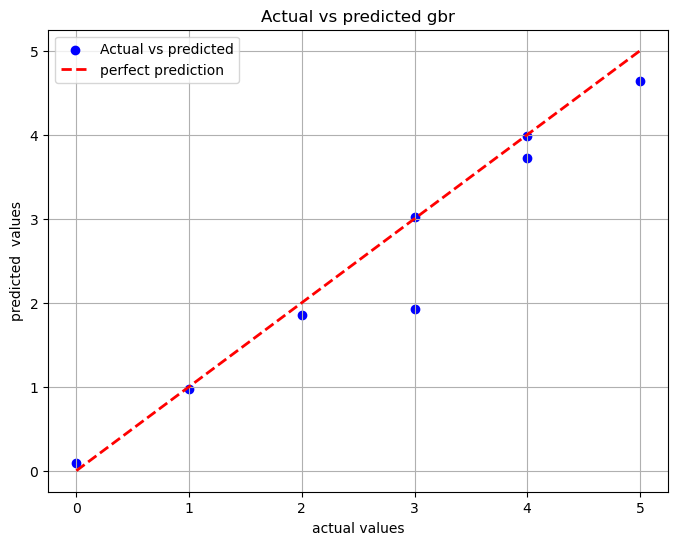

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred,color='blue',marker='o', label='Actual vs predicted')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],color='red', linestyle='--',lw=2, label='perfect prediction')
plt.xlabel('actual values')
plt.ylabel('predicted  values')
plt.title('Actual vs predicted gbr')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Assuming y_test contains the true labels
# Generate binary predictions using the model
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
print("accuracy score:", model.score(X_test, y_test))


accuracy score: 0.375


C:\Users\DHAVAL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\DHAVAL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
